# Introduction to Machine Learning Workshop
## Data Science Society at Berkeley

* __Date__: April 18, 2018

* __Author__ - Alex Nakagawa

* _Last Updated_: April 18, 2018

* __License__: Feel free to use this notebook in any way that you would like.

## Introduction

Welcome to the Introduction to Machine Learning Workshop! We appreciate you coming to take the time to learn about one of the most exciting subjects in industry today: machine learning! We are here to help guide you through the basics of how Machine Learning is structured through multiple theoretical case study analyses.

The purpose of this Jupyter Notebook is to give you a guided walkthrough of case studies that we will go over in class so that you can understand every detail of what goes on in each case study. Let's begin!

## Structure

We've developed a general, but somewhat rigid structure to follow when you do any kind of data science project in model building:

| Step | Name |
| 1 | Preprocessing |
| 2 | EDA |
| 3 | Model Creation |
| 4 | Evaluation |
| 5 | Feature Engineering |



## Legend

If you see this arrow, it will ask you to fill in code or text to answer a question: <img src='down_arrow.png' style='width:50px;height:50px;'></img>

## Part 0: Packages

The following packages are STANDARD for any data science project. It is (almost) vital that you use these almost everytime. __Run the next block__.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Optional
# %matplotlib inline

Why do we need these specific packages? If you don't recognize a package, write about its benefits below

<img src='down_arrow.png' style='width:50px;height:50px;'></img>

`YOUR ANSWER HERE`

## Part I: Simple Linear Regression

__Linear regression__ is a predictive modeling technique for predicting a numeric response variable based on features.  
"Linear" in the name linear regression refers to the fact that this method fits a model where response bears linear relationship with features. (ie Z is proportional to first power of x)

__Z = X0 + a(X1) + b(X2) +.... where:__   
Z: predicted response  
X0: intercept  
a,b,..: Coefficients of X1,X2..  

If Y is the actual response and Z is the predicted response,    
__Y-Z= Residual__  
Average Residual defines model performance,residual equal to zero represents a perfect fit model.

Coefficients: [5.1]
Mean squared error: 8.849126090407222e-28


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


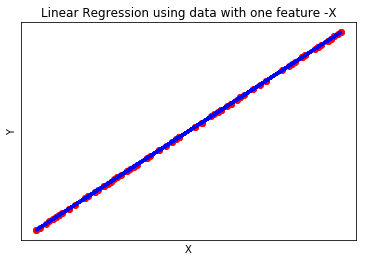

In [3]:
'''Source: Scikit learn
Code source: Jaques Grobler
License: BSD 3 clause'''
from sklearn.linear_model import LinearRegression

example_dff = pd.DataFrame(np.random.randint(0,100,size=(100, 1)),columns=['X'])
example_dff['C']=5.1*example_dff['X']
# example_dff['C']=5.1*example_dff['X']**2
X_reg = example_dff[['X']]

Y_reg = example_dff['C']

# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_reg, Y_reg)
Z_reg=model.predict(X_reg)

# The coefficients
print('Coefficients:', model.coef_)
# The mean squared error
print("Mean squared error:",np.mean((Z_reg - Y_reg) ** 2))

# Plot outputs
plt.scatter(X_reg['X'], Y_reg,  color='red')
plt.plot(X_reg['X'], Z_reg, color='blue',
         linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using data with one feature -X')
plt.xticks(())
plt.yticks(())

plt.show()

## Part II: Simple Classification

This case study will go over the structure of creating a simple classification.

We will first look at Kickstarter data found on Kaggle [here]('https://www.kaggle.com/kemical/kickstarter-projects'). Before we do ANYTHING, what are we even working with? READ any available documentation for a dataset you find publicly online. Why do we want to do this? <img src='down_arrow.png' style='width:50px;height:50px;'></img>

`YOUR ANSWER HERE`

### Section 1. Preprocessing

Let's take a look at what our data actually looks like now. Several things we want to check for:

* Are there missing values?
* Are the columns the dtypes that we want?
* What exactly does each row represent?

More details about what to look for from a public data set are here: https://www.textbook.ds100.org/ch01/the_students_of_ds100_1.html

We'll import the data using the `pandas.read_csv` function.

In [4]:
kickstarter = pd.read_csv('kickstarter.csv')
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


See anything interesting? Probably not from just looking at the first 5 rows. Let's continue to familiarize ourself with this dataset. We're now going to summarize our data. Luckily, `pandas` makes that pretty easy.

In [5]:
kickstarter.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
kickstarter.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


What do you think are some problems we may run into looking at these three function calls?

<img src='down_arrow.png' style='width:50px;height:50px;'></img>

`YOUR ANSWER HERE`

Wow, that's a lot of missing values for `usd_pledged`... let's see what those rows look like

In [8]:
null_rows = kickstarter.isnull().any(axis=1)
kickstarter[null_rows]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00


How should we deal with these missing values? 

<img src='down_arrow.png' style='width:50px;height:50px;'></img>

`YOUR ANSWER HERE`

There are a ton of rows, over 300,000 of them! It'd be ok to drop the 3700 ish that are missing

In [9]:
print('Before: ', kickstarter.shape)
kickstarter = kickstarter.dropna(axis=0, how='any')
print('After: ', kickstarter.shape)
kickstarter.isnull().sum()

Before:  (378661, 15)
After:  (374860, 15)


ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

### Section 2. EDA (Exploratory Data Analysis)

We've now set our data into a good place to begin exploring statistically.

Now that we've fixed the values, let's further our understanding by finding the different categories for our columns. We noticed that there's a `main_category` variable, let's see what kinds of values that will take 

In [10]:
kickstarter['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

OR

In [11]:
count_categories = kickstarter.groupby('main_category').size()
count_categories

main_category
Art             28152
Comics          10819
Crafts           8809
Dance            3767
Design          30066
Fashion         22812
Film & Video    62696
Food            24599
Games           35225
Journalism       4754
Music           49530
Photography     10778
Publishing      39379
Technology      32562
Theater         10912
dtype: int64

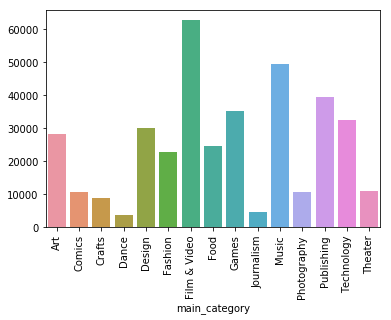

In [12]:
g = sns.barplot(count_categories.index, count_categories)
for item in g.get_xticklabels():
    item.set_rotation(90)

Okay... interesting. Perhaps I want to see the current state of each project. Let's find a way to visualize that.

In [13]:
states = kickstarter.groupby('state').size()
states

state
canceled       38757
failed        197611
live            2798
successful    133851
suspended       1843
dtype: int64

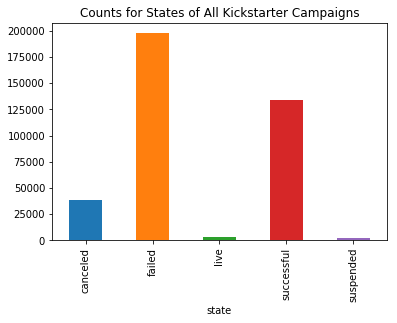

In [14]:
states.plot(kind='bar')
plt.title('Counts for States of All Kickstarter Campaigns');

This visualization is _okay_, but how can we improve it?  <img src='down_arrow.png' style='width:50px;height:50px;'></img>

`YOUR ANSWER HERE`

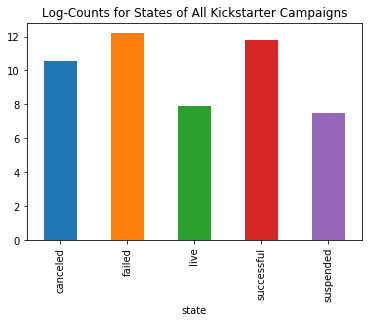

In [15]:
states_log = np.log(states)
states_log.plot(kind='bar')
plt.title('Log-Counts for States of All Kickstarter Campaigns');

Alright, we're now going to take the failed and successful columns in the film & video category to formulate some kind of question.  <img src='down_arrow.png' style='width:50px;height:50px;'></img>

In [16]:
kickstarter_failed_successful = kickstarter[(kickstarter['state']=='successful') |
                                                  (kickstarter['state']=='failed')]
kickstarter_failed_successful

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0.00,0.00,2406.39
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02 17:11:50,0.00,failed,0,US,0.00,0.00,5000.00


In [17]:
kickstarter_failed_successful['difference'] = kickstarter_failed_successful['usd_pledged_real'] - \
                                                 kickstarter_failed_successful['usd_goal_real']
kickstarter_failed_successful[['difference']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,difference
0,-1533.95
1,-27579.00
2,-44780.00
3,-4999.00
5,2375.00
6,205.00
7,-24547.00
10,-2406.39
11,200.00
12,-5000.00


In [18]:
kickstarter_failed_successful.sort_values(by='difference', ascending=False)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,difference
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,5.000000e+05,1.983899e+07
250254,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,50000.0,2014-07-08 10:14:37,13285226.36,successful,62642,US,13285226.36,13285226.36,5.000000e+04,1.323523e+07
289915,545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,100000.0,2016-11-25 06:01:41,12393139.69,successful,19264,US,5228482.00,12393139.69,1.000000e+05,1.229314e+07
216629,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,1000000.0,2016-05-24 15:49:52,12779843.49,successful,66673,US,12779843.49,12779843.49,1.000000e+06,1.177984e+07
282416,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,100000.0,2012-04-11 06:59:04,10266845.74,successful,68929,US,10266845.74,10266845.74,1.000000e+05,1.016685e+07
293861,565687737,The World's Best TRAVEL JACKET with 15 Feature...,Product Design,Design,USD,2015-09-03,20000.0,2015-07-07 13:52:34,9192055.66,successful,44949,US,9192055.66,9192055.66,2.000000e+04,9.172056e+06
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,1.000000e+04,8.772572e+06
6665,1033978702,OUYA: A New Kind of Video Game Console,Gaming Hardware,Games,USD,2012-08-09,950000.0,2012-07-10 14:44:41,8596474.58,successful,63416,US,8596474.58,8596474.58,9.500000e+05,7.646475e+06
309630,647013276,"THE 7th CONTINENT – What Goes Up, Must Come Down.",Tabletop Games,Games,USD,2017-10-19,40000.0,2017-09-26 20:00:02,7072757.00,successful,43733,US,1574139.50,7072757.00,4.000000e+04,7.032757e+06
75900,1386523707,Fidget Cube: A Vinyl Desk Toy,Product Design,Design,USD,2016-10-20,15000.0,2016-08-30 22:02:09,6465690.30,successful,154926,US,13770.00,6465690.30,1.500000e+04,6.450690e+06


Here's a general question: what kind of factors go into a successful/failed Kickstarter project? Could it be that the number of backers have an impact on whether people want to back a certain project? Or could it be perhaps that one country has more projects than another, which would generate more interest? Give an example of another column that could lead to a "successful" state for a project (besides the fact that it reaches its goal). <img src='down_arrow.png' style='width:50px;height:50px;'></img>

`YOUR ANSWER HERE`

Hoorah! Now we know that we want to do a classification on the dataset. Some of the columns are not numeric, so let's fix that now.

In [19]:
kickstarter_failed_successful = kickstarter_failed_successful.drop(['name', 
                                                                    'category', 
                                                                    'deadline', 
                                                                    'launched'], axis=1)

In [23]:
categories_list = count_categories.index.tolist()

kickstarter_failed_successful['main_category'] = kickstarter_failed_successful['main_category'].replace( 
    categories_list,
    np.arange(len(categories_list))
)

kickstarter_failed_successful['currency'] = kickstarter_failed_successful['currency'].replace( 
    kickstarter_failed_successful['currency'].unique(),
    np.arange(len(kickstarter_failed_successful['currency'].unique()))
)

kickstarter_failed_successful['country'] = kickstarter_failed_successful['country'].replace( 
    kickstarter_failed_successful['country'].unique(),
    np.arange(len(kickstarter_failed_successful['country'].unique()))
)

kickstarter_failed_successful['state'] = kickstarter_failed_successful['state'].replace( 
    ['successful', 'failed'],
    [1, 0]
)


In [24]:
print("Kickstarter dataframe shape (just failed, successful, and dropped cols): " , kickstarter_failed_successful.shape)
kickstarter_failed_successful

Kickstarter dataframe shape (just failed, successful, and dropped cols):  (331462, 12)


,ID,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,difference
0,1000002330,12,0,1000.0,0.00,0,0,0,0.00,0.00,1533.95,-1533.95
1,1000003930,6,1,30000.0,2421.00,0,15,1,100.00,2421.00,30000.00,-27579.00
2,1000004038,6,1,45000.0,220.00,0,3,1,220.00,220.00,45000.00,-44780.00
3,1000007540,10,1,5000.0,1.00,0,1,1,1.00,1.00,5000.00,-4999.00
5,1000014025,7,1,50000.0,52375.00,1,224,1,52375.00,52375.00,50000.00,2375.00
6,1000023410,7,1,1000.0,1205.00,1,16,1,1205.00,1205.00,1000.00,205.00
7,1000030581,7,1,25000.0,453.00,0,40,1,453.00,453.00,25000.00,-24547.00
10,100004721,12,2,2500.0,0.00,0,0,2,0.00,0.00,2406.39,-2406.39
11,100005484,10,1,12500.0,12700.00,1,100,1,12700.00,12700.00,12500.00,200.00
12,1000055792,2,1,5000.0,0.00,0,0,1,0.00,0.00,5000.00,-5000.00


There's one final worry in our data... but it may not be so obvious. What is it? <img src='down_arrow.png' style='width:50px;height:50px;'></img>

`YOUR ANSWER HERE`

### Section 3. Model

In [25]:
df = kickstarter_failed_successful.sample(5000)
df

,ID,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,difference
340671,80514880,12,2,3000.0,0.00,0,0,2,0.00,0.00,2737.98,-2737.98
253650,360001463,13,1,1500.0,805.00,0,23,1,805.00,805.00,1500.00,-695.00
199941,2018088614,4,1,38000.0,2113.00,0,35,1,2113.00,2113.00,38000.00,-35887.00
371929,96517750,6,1,20000.0,21468.00,1,166,1,21468.00,21468.00,20000.00,1468.00
127818,1648799455,7,1,10000.0,10376.00,1,39,1,10376.00,10376.00,10000.00,376.00
339179,797672334,14,1,5000.0,5125.84,1,139,1,5125.84,5125.84,5000.00,125.84
126463,1642067280,9,1,25000.0,534.00,0,10,1,534.00,534.00,25000.00,-24466.00
137410,1697695514,12,2,750.0,1495.00,1,39,2,93.61,1134.55,569.17,565.38
263283,409000857,0,1,300.0,629.00,1,70,1,629.00,629.00,300.00,329.00
288082,535780737,12,1,13000.0,130.00,0,2,1,130.00,130.00,13000.00,-12870.00


In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1),
                                                    df['state'], test_size=0.2,
                                                    random_state=7)

# Creating model
model = SVC()

# Fitting model
model.fit(X_train, y_train)
predicted = cross_val_predict(model, X_test, y_test, cv=5) #CHANGE cv=?

### Section 4. Model Evaluation + 5. Feature Engineering (Optional)

In [27]:
# Scoring
metrics.accuracy_score(y_test, predicted)

0.588

How was the model evaluation score? Not so great, right? let's think of ways to improve: <img src='down_arrow.png' style='width:50px;height:50px;'></img>

`YOUR ANSWER HERE`



The following process is called to normalize your dataframe.

In [ ]:
df['goal'] = (df['goal'] - df['goal'].mean()) / (df['goal'].max() - df['goal'].min())
df['pledged'] = (df['pledged'] - df['pledged'].mean()) / (df['pledged'].max() - df['pledged'].min())
df['backers'] = (df['backers'] - df['backers'].mean()) / (df['backers'].max() - df['backers'].min())
df['usd pledged'] = (df['usd pledged'] - df['usd pledged'].mean()) / (df['usd pledged'].max() - df['usd pledged'].min())
df['usd_pledged_real'] = (df['usd_pledged_real'] - df['usd_pledged_real'].mean()) / (df['usd_pledged_real'].max() - df['usd_pledged_real'].min())
df['usd_goal_real'] = (df['usd_goal_real'] - df['usd_goal_real'].mean()) / (df['usd_goal_real'].max() - df['usd_goal_real'].min())
df['difference'] = (df['difference'] - df['difference'].mean()) / (df['difference'].max() - df['difference'].min())

X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1),
                                                    df['state'], test_size=0.2,
                                                    random_state=7)

# Creating model
model = SVC()

# Fitting model
model.fit(X_train, y_train)
predicted = cross_val_predict(model, X_test, y_test, cv=5)
metrics.accuracy_score(y_test, predicted)